In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.datasets import mnist

import numpy as np
import sys
import os
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(len(X_train), 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(len(X_test), 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
MODEL_DIR = './model_image/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
else:
    shutil.rmtree(MODEL_DIR)
    os.mkdir(MODEL_DIR)

In [8]:
model_path = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"
# model_path = "./model_image/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=30, batch_size=200, verbose=0, callbacks=[checkpoint, earlystopping] )


Epoch 00001: val_loss improved from inf to 0.09260, saving model to ./model_image\01-0.0926.hdf5

Epoch 00002: val_loss improved from 0.09260 to 0.06070, saving model to ./model_image\02-0.0607.hdf5

Epoch 00003: val_loss improved from 0.06070 to 0.05055, saving model to ./model_image\03-0.0505.hdf5

Epoch 00004: val_loss improved from 0.05055 to 0.04773, saving model to ./model_image\04-0.0477.hdf5

Epoch 00005: val_loss did not improve from 0.04773

Epoch 00006: val_loss did not improve from 0.04773

Epoch 00007: val_loss improved from 0.04773 to 0.04667, saving model to ./model_image\07-0.0467.hdf5

Epoch 00008: val_loss improved from 0.04667 to 0.04573, saving model to ./model_image\08-0.0457.hdf5

Epoch 00009: val_loss improved from 0.04573 to 0.04413, saving model to ./model_image\09-0.0441.hdf5

Epoch 00010: val_loss did not improve from 0.04413

Epoch 00011: val_loss improved from 0.04413 to 0.04319, saving model to ./model_image\11-0.0432.hdf5

Epoch 00012: val_loss improved 

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[checkpoint, earlystopping] )

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

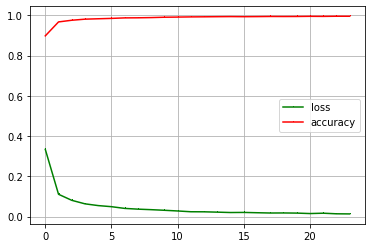

In [12]:
plt.plot(history.history['loss'], marker=',', c='g', label='loss')
plt.plot(history.history['accuracy'], marker=',', c='r', label='accuracy')
plt.grid()
plt.legend()
plt.show()

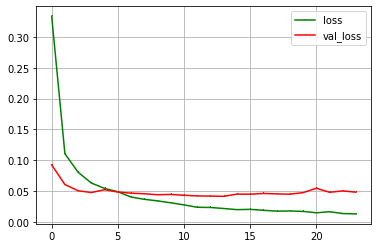

In [16]:
plt.plot(history.history['loss'], marker=',', c='g', label='loss')
plt.plot(history.history['val_loss'], marker=',', c='r', label='val_loss')
plt.grid()
plt.legend()
plt.show()

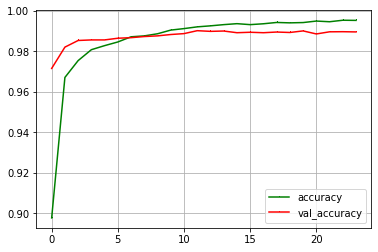

In [17]:
plt.plot(history.history['accuracy'], marker=',', c='g', label='accuracy')
plt.plot(history.history['val_accuracy'], marker=',', c='r', label='val_accuracy')
plt.grid()
plt.legend()
plt.show()

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0313 - accuracy: 0.9923


In [14]:
loss, accuracy

(0.03126908093690872, 0.9922999739646912)

In [23]:
for x in model.predict(X_test):
    print(np.argmax(x), end=", ")

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5

0, 5, 1, 0, 2, 2, 6, 4, 4, 3, 9, 6, 1, 6, 5, 7, 9, 2, 0, 2, 6, 0, 1, 4, 3, 5, 2, 8, 8, 0, 8, 8, 9, 0, 9, 6, 7, 6, 3, 9, 3, 4, 7, 7, 7, 4, 9, 0, 6, 4, 9, 4, 2, 7, 2, 8, 1, 0, 0, 7, 8, 3, 3, 3, 1, 3, 7, 6, 1, 3, 1, 6, 6, 5, 7, 4, 7, 5, 9, 5, 8, 4, 9, 9, 1, 6, 5, 0, 1, 3, 7, 0, 3, 4, 8, 2, 2, 0, 2, 5, 1, 5, 1, 4, 8, 8, 9, 1, 2, 1, 3, 5, 1, 0, 9, 4, 4, 8, 3, 2, 5, 9, 7, 6, 6, 2, 0, 0, 0, 5, 8, 8, 1, 5, 2, 3, 8, 5, 1, 8, 2, 0, 4, 9, 9, 6, 2, 3, 3, 5, 6, 4, 8, 0, 9, 2, 8, 3, 6, 7, 5, 7, 2, 9, 4, 9, 1, 2, 8, 6, 0, 7, 0, 9, 1, 1, 6, 7, 5, 9, 9, 1, 9, 5, 9, 2, 5, 0, 4, 1, 0, 8, 9, 0, 8, 9, 8, 9, 4, 2, 5, 7, 9, 8, 9, 8, 0, 9, 9, 6, 8, 9, 9, 5, 9, 8, 5, 1, 0, 3, 3, 5, 2, 1, 6, 5, 0, 2, 8, 1, 5, 6, 2, 3, 0, 2, 2, 6, 4, 3, 5, 5, 1, 7, 2, 1, 6, 9, 1, 9, 9, 5, 5, 1, 6, 2, 2, 8, 6, 7, 1, 4, 6, 0, 6, 0, 3, 3, 2, 2, 3, 6, 8, 9, 8, 5, 3, 8, 5, 4, 5, 2, 0, 5, 6, 3, 2, 8, 3, 9, 9, 5, 7, 9, 4, 6, 7, 1, 3, 7, 3, 6, 6, 0, 9, 0, 1, 9, 9, 2, 8, 8, 0, 1, 6, 9, 7, 5, 3, 4, 7, 4, 9, 9, 4, 3, 6, 3, 1, 1, 7, 6, 9, 1

, 7, 2, 5, 9, 6, 9, 2, 6, 2, 1, 2, 0, 8, 3, 8, 3, 0, 8, 7, 4, 9, 5, 0, 9, 7, 0, 0, 4, 6, 0, 9, 1, 6, 2, 7, 6, 8, 3, 5, 2, 1, 8, 3, 8, 6, 1, 0, 2, 1, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 6, 4, 7, 6, 2, 3, 4, 8, 7, 8, 6, 9, 8, 3, 2, 2, 8, 4, 8, 5, 6, 5, 0, 2, 0, 1, 1, 2, 9, 6, 8, 2, 1, 0, 6, 5, 2, 9, 7, 5, 3, 9, 3, 7, 1, 8, 3, 8, 1, 9, 5, 5, 0, 1, 1, 9, 8, 2, 6, 0, 4, 5, 0, 3, 1, 8, 6, 7, 5, 9, 9, 3, 0, 3, 1, 4, 4, 0, 4, 9, 0, 1, 2, 3, 5, 6, 7, 8, 0, 1, 2, 3, 5, 6, 7, 8, 9, 0, 1, 2, 3, 5, 6, 7, 8, 9, 9, 7, 0, 9, 0, 1, 5, 8, 8, 0, 9, 3, 2, 7, 8, 4, 6, 1, 0, 4, 9, 4, 2, 0, 5, 0, 1, 6, 9, 3, 2, 9, 1, 6, 0, 1, 1, 8, 7, 7, 6, 3, 6, 0, 7, 2, 4, 1, 7, 0, 6, 7, 1, 2, 5, 8, 1, 8, 2, 8, 7, 6, 8, 7, 1, 6, 2, 9, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 9, 5, 7, 0, 3, 1, 6, 8, 4, 1, 5, 6, 4, 2, 7, 8, 1, 3, 4, 3, 4, 7, 2, 0, 5, 0, 1, 9, 2, 3, 2, 3, 5, 5, 7, 8, 4, 9, 9, 7, 1, 1, 9, 0, 7, 8,

In [20]:
np.argmax(model.predict(X_test))

7

In [39]:
(X_train1, Y_train1), (X_test1, Y_test1) = mnist.load_data()

In [25]:
Y_test1

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [37]:
# compare predicted values with real values
sum_eq = 0
for i, x in enumerate(model.predict(X_test1)):
    if np.argmax(x) == Y_test1[i] :
        sum_eq += 1
    else:
        print('order: {}, predict: {}, value: {}'.format(i, np.argmax(x), Y_test1[i]))
print(sum_eq/len(X_test1))

order: 321, predict: 7, value: 2
order: 449, predict: 5, value: 3
order: 495, predict: 2, value: 8
order: 659, predict: 1, value: 2
order: 723, predict: 4, value: 0
order: 740, predict: 9, value: 4
order: 938, predict: 5, value: 3
order: 1014, predict: 5, value: 6
order: 1226, predict: 2, value: 7
order: 1232, predict: 4, value: 9
order: 1242, predict: 9, value: 4
order: 1247, predict: 5, value: 9
order: 1260, predict: 1, value: 7
order: 1319, predict: 0, value: 8
order: 1393, predict: 3, value: 5
order: 1522, predict: 9, value: 7
order: 1530, predict: 7, value: 8
order: 1621, predict: 6, value: 0
order: 1686, predict: 6, value: 8
order: 1709, predict: 5, value: 9
order: 1901, predict: 4, value: 9
order: 2018, predict: 7, value: 1
order: 2043, predict: 8, value: 4
order: 2070, predict: 9, value: 7
order: 2109, predict: 7, value: 3
order: 2129, predict: 2, value: 9
order: 2130, predict: 9, value: 4
order: 2135, predict: 1, value: 6
order: 2280, predict: 5, value: 3
order: 2293, predict:

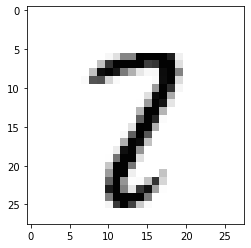

In [38]:
plt.imshow(X_test1[321], cmap='Greys')  # predicted 7, real 2
plt.show()

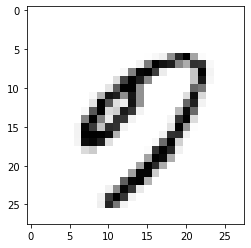

In [44]:
plt.imshow(X_test1[4163], cmap='Greys')  # predicted 7, real 9
plt.show()

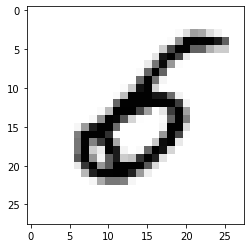

In [43]:
plt.imshow(X_test1[9729], cmap='Greys')  # predicted 6, real 5
plt.show()